In [5]:
# EXPERIMENTAL MODEL 
# Testing impact of decreased efflux capacity on toxin levels in the cell and in the well

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Constants and initial conditions
V_Cell_Monolayer = 3.2e-07
V_Mem = 0.0032
V_Well = 0.0001
initial_OAT1 = 0.190962
initial_PCS_C = 0
initial_PCS_OAT1 = 0
Kr_Uptake = 0.000
Kr_dissociation = 0.000

#Uremic
initial_PCS_B = 200
Kf_Uptake = 1.99e-5
Kf_dissociation = 4.05e-04

#Healthy 
#initial_PCS_B = 10
#Kf_Uptake = 1.44e-5
#Kf_dissociation = 5.78e-04

y0 = [initial_PCS_B, initial_OAT1, initial_PCS_OAT1, initial_PCS_C]

# Define the model function
def model(t, y, params):
    PCS_B, OAT1, PCS_OAT1, PCS_C = y
    Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, Vmax_Efflux, Km_Efflux, V_Mem, V_Well, V_Cell_Monolayer = params

    dPCS_Bdt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + 
               ((Vmax_Efflux * PCS_C) / (Km_Efflux + PCS_C)) * V_Mem) / V_Well
    dOAT1dt = (-((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) + 
               (Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem) / V_Mem
    dPCS_OAT1dt = (((Kf_Uptake * OAT1 * PCS_B + (-Kr_Uptake * PCS_OAT1)) * V_Mem) - 
                   ((Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Mem
    dPCS_Cdt = ((-(Vmax_Efflux * PCS_C) / (Km_Efflux + PCS_C) * V_Mem) + 
               ((Kf_dissociation * PCS_OAT1 + (-Kr_dissociation * OAT1 * PCS_C)) * V_Mem)) / V_Cell_Monolayer

    return [dPCS_Bdt, dOAT1dt, dPCS_OAT1dt, dPCS_Cdt]

# Time span and evaluation points
t_span = (0, 3600)  # seconds
t_eval = np.linspace(*t_span, 500)


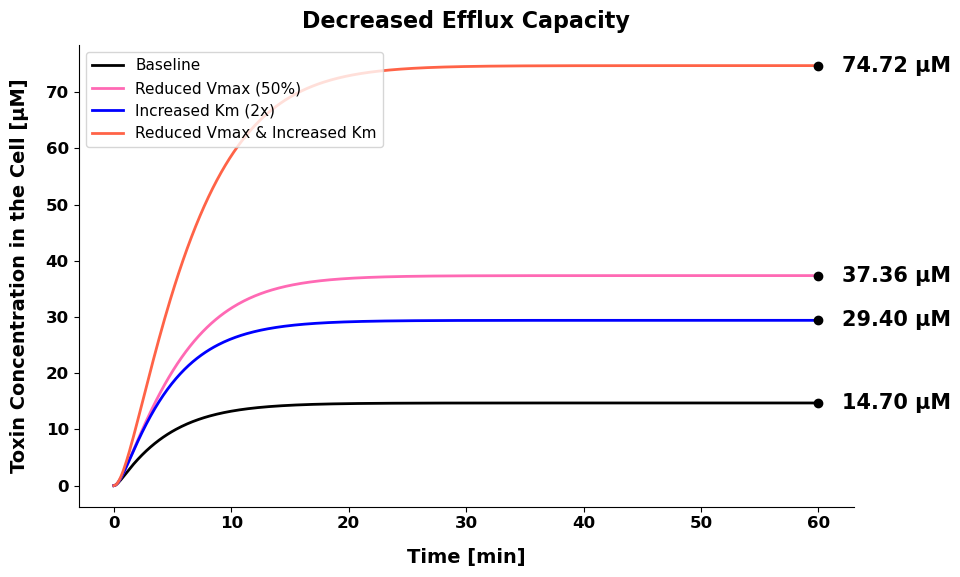

In [6]:
# Simulation scenarios with different parameter sets
scenarios = {
    "Baseline": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.0003986), 69, V_Mem, V_Well, V_Cell_Monolayer],
    "Reduced Vmax (50%)": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.5 * 0.0003986), 69, V_Mem, V_Well, V_Cell_Monolayer],
    "Increased Km (2x)": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.0003986), 138, V_Mem, V_Well, V_Cell_Monolayer],
    "Reduced Vmax & Increased Km": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.5 * 0.0003986), 138, V_Mem, V_Well, V_Cell_Monolayer],
}

# Store simulation results
results = {}

# Run simulations for each scenario
for label, params in scenarios.items():
    solution = solve_ivp(
        model, t_span, y0, args=(params,), t_eval=t_eval, method='BDF', rtol=1e-6, atol=1e-9
    )
    results[label] = solution

plt.figure(figsize=(10, 6))
for i, (label, solution) in enumerate(results.items()):
    time_minutes = solution.t / 60  # Convert time to minutes
    
    if label == "Baseline":
        plt.plot(time_minutes, solution.y[3], label=label, linestyle='-', linewidth=2, color='black')  
    elif label == "Reduced Vmax (50%)":
        plt.plot(time_minutes, solution.y[3], label=label, linestyle='-', linewidth=2, color='hotpink') 
    elif label == "Increased Km (2x)":
        plt.plot(time_minutes, solution.y[3], label=label, linestyle='-', linewidth=2, color='blue')  
    elif label == "Reduced Vmax & Increased Km":
        plt.plot(time_minutes, solution.y[3], label=label, linestyle='-', linewidth=2, color='tomato') 

    # Find the maximum value of PCS_C and its corresponding time
    max_PCS_C = np.max(solution.y[3])  # Maximum PCS_C value
    max_time = solution.t[np.argmax(solution.y[3])] / 60  # Time when maximum occurs, converted to minutes
    
    # Plot the maximum PCS_C point as a red marker
    plt.scatter(max_time, max_PCS_C, color='black', zorder=5)  # Scatter plot of max point
    plt.text(max_time + 2, max_PCS_C, f'{max_PCS_C:.2f} µM', fontsize=15, fontweight='bold', ha='left', va='center')

# Customize plot
plt.xlabel("Time [min]", fontsize=14, fontweight='bold', labelpad=12)
plt.ylabel("Toxin Concentration in the Cell [µM]", fontsize=14, fontweight='bold', labelpad=12)
plt.legend(fontsize=11, loc='upper left')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Decreased Efflux Capacity", fontsize=16, fontweight='bold', pad=12)
plt.savefig("R_Efflux.png", dpi=300)
plt.show()


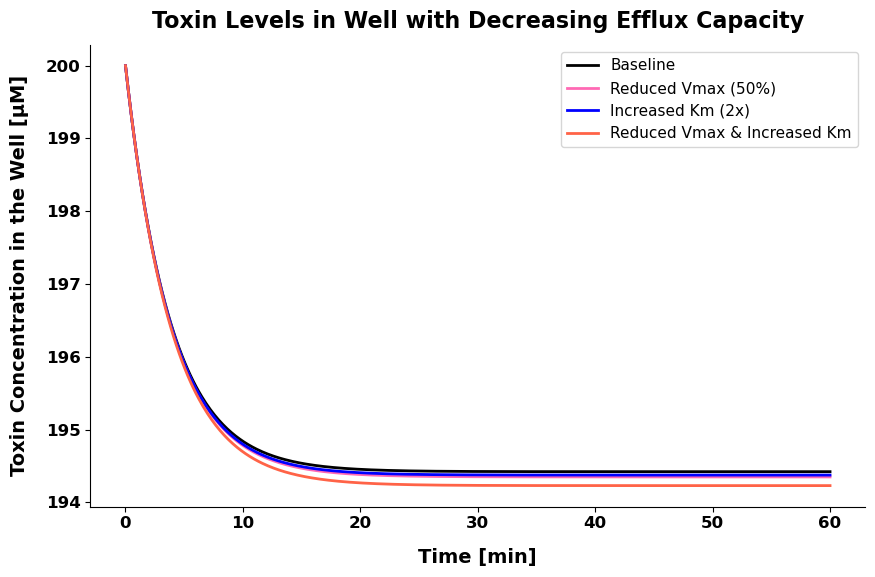

In [7]:
# Simulation scenarios with different parameter sets
scenarios = {
    "Baseline": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.0003986), 69, V_Mem, V_Well, V_Cell_Monolayer],
    "Reduced Vmax (50%)": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.5 * 0.0003986), 69, V_Mem, V_Well, V_Cell_Monolayer],
    "Increased Km (2x)": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.0003986), 138, V_Mem, V_Well, V_Cell_Monolayer],
    "Reduced Vmax & Increased Km": [Kf_Uptake, Kr_Uptake, Kf_dissociation, Kr_dissociation, (0.5 * 0.0003986), 138, V_Mem, V_Well, V_Cell_Monolayer],
}


# Store simulation results
results = {}

# Run simulations for each scenario
for label, params in scenarios.items():
    solution = solve_ivp(
        model, t_span, y0, args=(params,), t_eval=t_eval, method='BDF', rtol=1e-6, atol=1e-9
    )
    results[label] = solution

plt.figure(figsize=(10, 6))
for i, (label, solution) in enumerate(results.items()):
    time_minutes = solution.t / 60  # Convert time to minutes
    
    if label == "Baseline":
        plt.plot(time_minutes, solution.y[0], label=label, linestyle='-', linewidth=2, color='black')  
    elif label == "Reduced Vmax (50%)":
        plt.plot(time_minutes, solution.y[0], label=label, linestyle='-', linewidth=2, color='hotpink') 
    elif label == "Increased Km (2x)":
        plt.plot(time_minutes, solution.y[0], label=label, linestyle='-', linewidth=2, color='blue')  
    elif label == "Reduced Vmax & Increased Km":
        plt.plot(time_minutes, solution.y[0], label=label, linestyle='-', linewidth=2, color='tomato') 

# Customize plot
plt.xlabel("Time [min]", fontsize=14, fontweight='bold', labelpad=12)
plt.ylabel("Toxin Concentration in the Well [µM]", fontsize=14, fontweight='bold', labelpad=12)
plt.legend(fontsize=11, loc='upper right')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Toxin Levels in Well with Decreasing Efflux Capacity", fontsize=16, fontweight='bold', pad=12)
plt.savefig("R_Efflux_Well.png", dpi=300)
plt.show()
